In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation
from tensorflow.keras.models import Model

# 입력 레이어 (예시로 입력 이미지 크기를 (28, 28, 1)로 설정)
input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)

# Conv2D 레이어
x = Conv2D(5, kernel_size=(3, 3), strides=(1, 1), padding='same')(inputs)

# MaxPooling2D 레이어
x = MaxPooling2D(pool_size=(3, 3))(x)

# Flatten 레이어
x = Flatten()(x)

# Dropout 레이어
x = Dropout(0.5)(x)

# Dense (Linear) 레이어
x = Dense(10)(x)

# Sigmoid 활성화 함수
outputs = Activation('relu')(x)

# 모델 정의
model = Model(inputs=inputs, outputs=outputs)

# 모델 요약 출력
model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 5)         50        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 5)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 405)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 405)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4060      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0   

In [14]:
# mnist data load and preprocessing
from tensorflow.keras.datasets import mnist

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 , 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 , 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]# 

In [15]:
# model compile and fit argument
model.compile(
	    optimizer="sgd",
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"])
history = model.fit(train_images, train_labels,
          batch_size=20,
          epochs=5,
          validation_data=(val_images, val_labels))

Epoch 1/5
2500/2500 [==============================] - 19s 7ms/step - loss: 2.4994 - accuracy: 0.1400 - val_loss: 2.3026 - val_accuracy: 0.1041
Epoch 2/5
2500/2500 [==============================] - 19s 7ms/step - loss: 2.3490 - accuracy: 0.1183 - val_loss: 2.2538 - val_accuracy: 0.1026
Epoch 3/5
2500/2500 [==============================] - 19s 8ms/step - loss: 2.3177 - accuracy: 0.1186 - val_loss: 2.3026 - val_accuracy: 0.1066
Epoch 4/5
2500/2500 [==============================] - 18s 7ms/step - loss: 2.3207 - accuracy: 0.1197 - val_loss: 2.3026 - val_accuracy: 0.1048
Epoch 5/5
2500/2500 [==============================] - 18s 7ms/step - loss: 2.3019 - accuracy: 0.1160 - val_loss: 2.2964 - val_accuracy: 0.0997


accuracy:  0.116, validation accuracy: 0.100


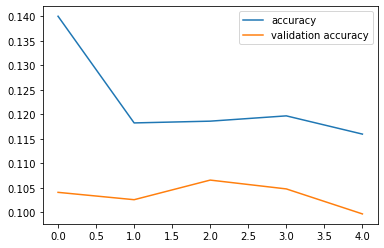

loss:  2.302, validation loss: 2.296


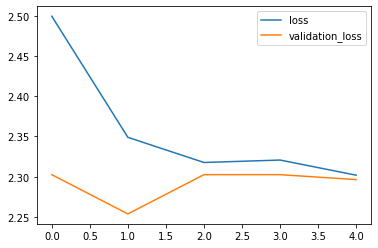

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

print(f"accuracy: {history.history['accuracy'][-1]: .3f}, validation accuracy: {history.history['val_accuracy'][-1]:.3f}")
plt.plot(range(5), history.history['accuracy'], label='accuracy')
plt.plot(range(5), history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
print(f"loss: {history.history['loss'][-1]: .3f}, validation loss: {history.history['val_loss'][-1]:.3f}")
plt.plot(range(5), history.history['loss'], label='loss')
plt.plot(range(5), history.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()